In [2]:
import analyse
from sys import platform
import os
import re
import importlib
import MDAnalysis as mda
import MDAnalysis.analysis.rms as rms
import MDAnalysis.analysis.hbonds
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
def save_figure(fig, target):
    fig.savefig(target)

In [4]:
importlib.reload(analyse)

<module 'analyse' from '/net/grouphome/ag-bondar/Eva_Bert/code/analyse.py'>

#### Define work folder:

In [5]:
PDB_CODE = '6b73'
SEQ = 'B'
folder = '../'+PDB_CODE+SEQ+'/'
results_folder = folder+'results/'
plot_folder = folder+'plots/'

#### Load trajectory files:

In [6]:
prod_file_count = len(sorted([results_folder+'namd/'+i for i in os.listdir(results_folder+'namd/') if re.match(r'(step7.).*\_production.dcd$', i)]))
prod_dcd = [results_folder+'namd/step7.'+str(i)+'_production.dcd' for i in range(1,prod_file_count+1)]
eq_dcd = [results_folder+'namd/step6.'+str(i)+'_equilibration.dcd' for i in range(1,7)]
all_dcd = list(np.concatenate((eq_dcd, prod_dcd)))
print(all_dcd)

['../6b73B/results/namd/step6.1_equilibration.dcd', '../6b73B/results/namd/step6.2_equilibration.dcd', '../6b73B/results/namd/step6.3_equilibration.dcd', '../6b73B/results/namd/step6.4_equilibration.dcd', '../6b73B/results/namd/step6.5_equilibration.dcd', '../6b73B/results/namd/step6.6_equilibration.dcd', '../6b73B/results/namd/step7.1_production.dcd', '../6b73B/results/namd/step7.2_production.dcd', '../6b73B/results/namd/step7.3_production.dcd', '../6b73B/results/namd/step7.4_production.dcd', '../6b73B/results/namd/step7.5_production.dcd', '../6b73B/results/namd/step7.6_production.dcd', '../6b73B/results/namd/step7.7_production.dcd', '../6b73B/results/namd/step7.8_production.dcd', '../6b73B/results/namd/step7.9_production.dcd', '../6b73B/results/namd/step7.10_production.dcd', '../6b73B/results/namd/step7.11_production.dcd', '../6b73B/results/namd/step7.12_production.dcd', '../6b73B/results/namd/step7.13_production.dcd', '../6b73B/results/namd/step7.14_production.dcd', '../6b73B/result

# RMSD

#### RMSD of all trajectory:

In [90]:
all_traj =  mda.Universe(results_folder+'step5_assembly.xplor_ext.psf', all_dcd)
# all_traj =  mda.Universe(results_folder+'step5_assembly.psf', all_dcd)


# ref = mda.Universe(folder+PDB_CODE+'_inp.pdb')
ref = mda.Universe(results_folder+'step5_assembly.namd.pdb')
# ref = mda.Universe(results_folder+'namd/step5_charmm2namd.pdb')

title = 'RMSD of C-alpha atoms'
R, r_fig = analyse.rmsd_traj(all_traj, ref, title)

/home/bertalae93/miniconda3/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:272: UserWarning: Serial numbers went over 100,000.  Higher serials have been guessed
  warnings.warn("Serial numbers went over 100,000.  "
/home/bertalae93/miniconda3/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:349: UserWarning: Invalid atom serials were present, bonds will not be parsed
  warnings.warn("Invalid atom serials were present, bonds will not"
/home/bertalae93/miniconda3/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:187: UserWarning: Invalid atom serials were present, bonds will not be parsed
  warnings.warn("Invalid atom serials were present, "


In [ ]:
save_figure(r_fig[0].figure, plot_folder+'all_rmsd')

#### RMSD of production steps:

In [88]:
prod_traj = mda.Universe(results_folder+'step5_assembly.xplor_ext.psf', prod_dcd)

title = 'RMSD of C-alpha atoms over production steps'
R, r_fig = analyse.rmsd_traj(prod_traj, ref, title)

In [ ]:
save_figure(r_fig[0].figure, plot_folder+'prod_rmsd')

# PBC

In [7]:
code = PDB_CODE+SEQ
vmd_mac = '/Applications/VMD\ 1.9.3.app/Contents/Resources/VMD.app/Contents/MacOS/VMD'
vmd_linux = '/net/opt/bin/vmd'

vmd = vmd_linux if platform == 'linux' else vmd_mac

In [8]:
print(code)
print(vmd)

6b73B
/net/opt/bin/vmd


In [9]:
# ! (cd './tcl' && $vmd  -dispdev text -e pbc.tcl -args $code > pbc_log.out)

# Water count:

In [10]:
def concatenate_water_per_frame(water_files):
    waters = np.loadtxt(water_files[0])
    for i in range(1, len(water_files)):
        data = np.loadtxt(water_files[i])
        waters = np.concatenate((waters, data))
    return waters

In [14]:
def plot_water_within(waters, title=''):
    plt.subplots(figsize=(10,5))
    fig = plt.plot(waters[:,1], linewidth=0.2)
    plt.ylabel('Number of water')
    plt.xlabel('Frame')
    plt.title(title)
    return fig

#### water within protein:

In [98]:
x = 11
y = 9
z = 15
_x = 13
_y = 12
_z = 18
distance = 5
parameters =  '{} {} {} {} {} {} {}'.format(x, y, z, _x, _y, _z, distance)

In [ ]:
# ! (cd './tcl' && $vmd -dispdev text -e water_within_protein.tcl -args $code $parameters > water_within_protein_log.out)

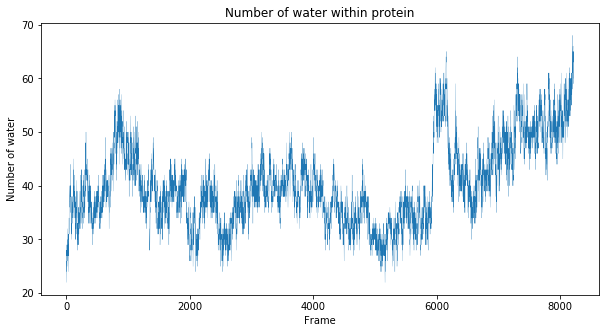

In [65]:
water_files1 = [results_folder+'namd/step7.'+str(i)+'_production.dcd-pbc.dcd-warter_count.txt' for i in range(1,prod_file_count+1)]
water_within_prot = concatenate_water_per_frame(water_files1)

fig_within_prot = plot_water_within(water_within_prot, title='Number of water within protein')

In [ ]:
save_figure(fig_within_prot[0].figure, plot_folder+'water_within_protein')
np.savetxt(plot_folder+'water_within_protein.txt', water_within_prot)

#### water count near residue:

In [12]:
resid = '233'
resname = 'TRP'
distance = 3
parameters =  '{} {} {}'.format(resid, resname, distance)
print(parameters)

233 TRP 3


In [ ]:
# ! (cd './tcl' && $vmd -dispdev text -e water_near_residue.tcl -args $code $parameters > water_near_residue_log.out)

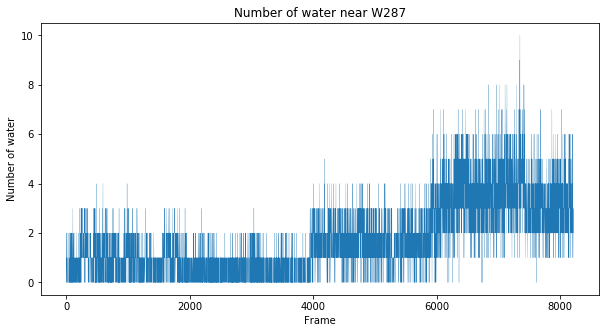

In [15]:
water_files2 = [results_folder+'namd/step7.'+str(i)+'_production.dcd-pbc.dcd-warter_3_of_233TRP.txt' for i in range(1,prod_file_count+1)]
water_near_233 = concatenate_water_per_frame(water_files2)
fig_near_233 = plot_water_within(water_near_233, title='Number of water near W287')

In [16]:
save_figure(fig_near_233[0].figure, plot_folder+'water_near_W287')
np.savetxt(plot_folder+'water_near_W287.txt', water_near_233)

In [17]:
resid = '84'
resname = 'ASP'
distance = 3
parameters =  '{} {} {}'.format(resid, resname, distance)
print(parameters)

84 ASP 3


In [18]:
! (cd './tcl' && $vmd -dispdev text -e water_near_residue.tcl -args $code $parameters > water_near_residue_log.out)

/net/opt/vmd/vmd-1.9.3/lib/vmd_LINUXAMD64: /lib/x86_64-linux-gnu/libGL.so.1: no version information available (required by /net/opt/vmd/vmd-1.9.3/lib/vmd_LINUXAMD64)


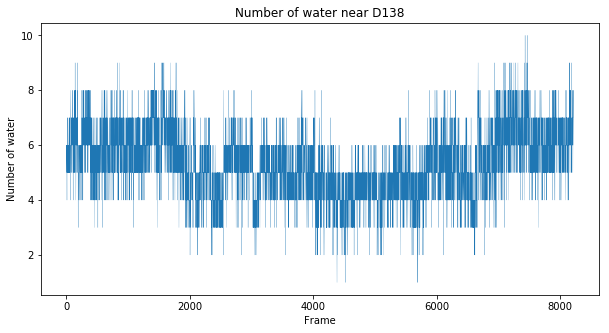

In [21]:
water_files3 = [results_folder+'namd/step7.'+str(i)+'_production.dcd-pbc.dcd-warter_3_of_84ASP.txt' for i in range(1,prod_file_count+1)]
water_near_84 = concatenate_water_per_frame(water_files3)

fig_near_84 = plot_water_within(water_near_84, title='Number of water near D138')

In [22]:
save_figure(fig_near_84[0].figure, plot_folder+'water_near_D138')
np.savetxt(plot_folder+'water_near_D138.txt', water_near_84)

#### water in binding pocket:

In [57]:
selection = {'(water within 3 of (resname THR and resid 55) or (resname ASP and resid 84) or (resname LYS and resid 173) or (resname TRP and resid 233) or (resname TYR and resid 266) or (resname GLY and resid 265)) and oxygen'}
print(selection)

{'(water within 3 of (resname THR and resid 55) or (resname ASP and resid 84) or (resname LYS and resid 173) or (resname TRP and resid 233) or (resname TYR and resid 266) or (resname GLY and resid 265)) and oxygen'}


In [58]:
! (cd './tcl' && $vmd -dispdev text -e water_in_pocket.tcl -args $code $selection > water_in_pocket_log.out)

/net/opt/vmd/vmd-1.9.3/lib/vmd_LINUXAMD64: /lib/x86_64-linux-gnu/libGL.so.1: no version information available (required by /net/opt/vmd/vmd-1.9.3/lib/vmd_LINUXAMD64)


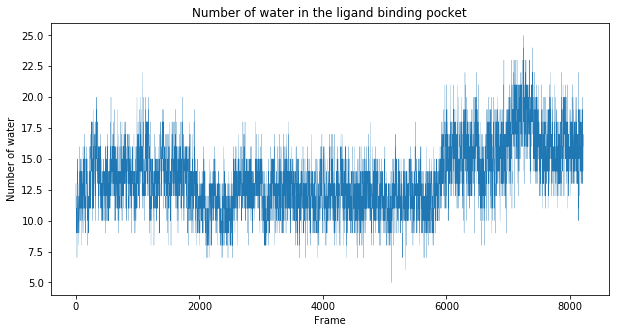

In [62]:
water_files4 = [results_folder+'namd/step7.'+str(i)+'_production.dcd-pbc.dcd-warter_in_pocket.txt' for i in range(1,prod_file_count+1)]
water_pocket = concatenate_water_per_frame(water_files4)

fig_water_pocket = plot_water_within(water_pocket, title='Number of water in the ligand binding pocket')

In [63]:
save_figure(fig_water_pocket[0].figure, plot_folder+'water_in_pocket')
np.savetxt(plot_folder+'water_in_pocket.txt', water_pocket)

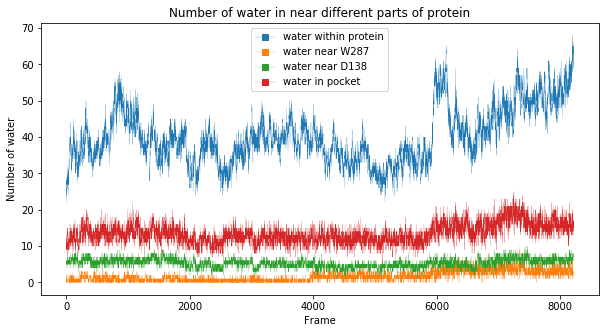

In [85]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(water_within_prot[:,1], linewidth=0.2, label='water within protein')
ax.plot(water_near_233[:,1], linewidth=0.2, label='water near W287')
ax.plot(water_near_84[:,1], linewidth=0.2, label='water near D138')
ax.plot(water_pocket[:,1], linewidth=0.2, label='water in pocket')


plt.ylabel('Number of water')
plt.xlabel('Frame')
plt.title('Number of water in near different parts of protein')

legend = ax.legend(frameon=True)
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_marker('s')

In [86]:
save_figure(fig, plot_folder+'water_number')

### Structure analysis of the protein:

In [ ]:
# pdb_file = folder+PDB_CODE+'_inp.pdb'
# struct = analyse.secondary_structure(pdb_file, PDB_CODE)
# print(struct)

In [ ]:
loop_inf = np.loadtxt(folder+'loop_inf.txt', dtype='int')
helix = np.array([])
for row in loop_inf:
    helix = np.concatenate((helix, np.arange(row[1], row[2]+1)))
struct = {'helix': helix}
print(struct)

### RMSF:

#### RMSF over production steps:

In [ ]:
rmsf_fig = analyse.rmsf_plot([prod_traj], title='RMSF of residues over production step', structure=struct)

In [ ]:
save_figure(rmsf_fig, plot_folder+'prod_rmsf')

## RMSD of the loops:

In [91]:
r = rms.RMSD(prod_traj.select_atoms('name CA'),
             ref.select_atoms('name CA'), 
             select='name CA', 
             groupselections=['name CA and resid 3-33',
                              'name CA and resid 39-67',
                              'name CA and resid 73-107', 
                              'name CA and resid 118-142',
                              'name CA and resid 167-201',
                              'name CA and resid 210-245',
                              'name CA and resid 252-279',
                              'name CA']).run()

In [92]:
R = r.rmsd.T
frame = R[0]
time = R[1]

r1 = np.average(R[2])
r2 = np.average(R[3])
r3 = np.average(R[4])
r4 = np.average(R[5])
r5 = np.average(R[6])
r6 = np.average(R[7])
r7 = np.average(R[8])
r_all = np.average(R[9])
r_helix = np.average([r1, r2, r3, r4, r5, r6, r7])

In [93]:
helix_data = {'all atom': [r_all],
              'all TM': r_helix,
              'TM1': r1,
              'TM2': r2,
              'TM3': r3,
              'TM4': r4,
              'TM5': r5,
              'TM6': r6,
              'TM7': r7,
             }
helix_rmsd = pd.DataFrame(data=helix_data)
print(helix_rmsd)

   all atom    all TM       TM1       TM2       TM3       TM4       TM5  \
0  1.501189  1.359256  2.076854  1.108492  1.211493  1.116929  1.243689   

        TM6      TM7  
0  1.052924  1.70441  


In [94]:
helix_rmsd.to_csv(plot_folder+'helix_rmsd.csv')

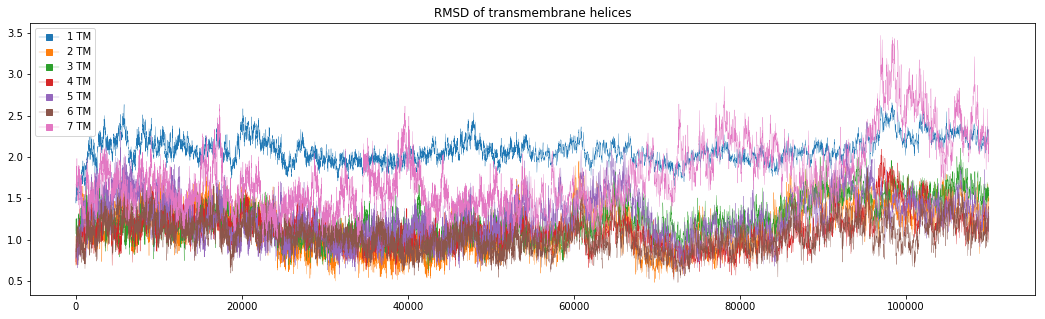

In [95]:
fig, ax = plt.subplots(1, figsize=(18,5))
ax.plot(time, R[2], linewidth=0.3, label='1 TM')
ax.plot(time, R[3], linewidth=0.3, label='2 TM')
ax.plot(time, R[4], linewidth=0.3, label='3 TM')
ax.plot(time, R[5], linewidth=0.3, label='4 TM')
ax.plot(time, R[6], linewidth=0.3, label='5 TM')
ax.plot(time, R[7], linewidth=0.3, label='6 TM')
ax.plot(time, R[8], linewidth=0.3, label='7 TM')
plt.title('RMSD of transmembrane helices')

legend = ax.legend(frameon=True)
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_marker('s')

In [96]:
save_figure(fig, plot_folder+'helix_rmsd')